Matteo Picciolini

# Esercitazione 3

In [1]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#numpy
import numpy as np

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercise 03.1 
### Plain vanilla option pricing 

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1.  By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2.  By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$ As usual, in computing statistical uncertainties, use data blocking.

### Risoluzione

In questa esercitazione, l'obiettivo è di analizzare numericamente la soluzione analitica al problema dell'*Option Pricing* utilizzando la teoria di Black-Scholes. La teoria di Black-Scholes è un modello matematico utilizzato per determinare il prezzo delle opzioni finanziarie, in particolare delle opzioni europee, sulla base di alcuni parametri, come il prezzo corrente dell'*asset*, il prezzo di esercizio, il tempo rimanente alla scadenza, la volatilità del prezzo dell'asset e il tasso di interesse privo di rischio.
In particolare, si vuole determinare i prezzi corretti delle opzioni europee di tipo *Call* e *Put*. Secondo la teoria di Black-Scholes, l'evoluzione nel tempo del prezzo di un *asset* segue un processo stocastico simile ad un Moto Browniano Geometrico (GBM), con un tasso di interesse privo di rischio $r$ costante e una volatilità $\sigma$.

#### Opzione europea

In ambito finanziario, un contratto tra due o più parti che prevede un onere per una parte e un diritto esercitabile per l'altra è noto come opzione. Tra le opzioni esistenti, la più semplice è l'opzione europea.  Questo tipo di opzione, è un tipo di contratto finanziario che dà all'acquirente il diritto, ma non l'obbligo, di acquistare (*Call option*) o vendere (*Put option*) un determinato *asset* ad un prezzo prefissato $K$, detto *strike price*, in un momento futuro prestabilito $T$, detto scadenza del contratto. È importante sottolineare che solo il venditore $A$ è vincolato dal contratto, mentre l'acquirente $B$ può decidere di esercitare il diritto solo se ciò comporta un profitto. 

Per una *Call option*, l'acquirente ha il diritto di acquistare l'*asset* al prezzo di esercizio, se al momento della scadenza il prezzo di mercato dell'*asset* $S(T)$ supera il prezzo di esercizio, ottenendo un profitto pari a $S(T)-K$. In caso contrario, l'acquirente $B$ non esercita il diritto, e il venditore dell'opzione $A$ guadagna il premio dell'opzione.

Per una *Put option*, l'acquirente ha il diritto di vendere l'*asset* al prezzo di esercizio, se al momento della scadenza il prezzo di mercato dell'*asset* $S(T)$ è inferiore al prezzo di esercizio, ottenendo un profitto pari a $K-S(T)$. In caso contrario, l'acquirente $B$ non esercita il diritto, e il venditore dell'opzione $A$ guadagna il premio dell'opzione.

L'elemento che caratterizza l'opzione europea rispetto ad altre opzioni è il vincolo $T$, infatti l'opzione europea può essere esercitata solo alla scadenza del contratto, mentre le altre opzioni possono essere esercitate in qualsiasi momento prima della scadenza.

#### Generazione diretta e indiretta

Nella la teoria di B.S., l'*asset* ha un prezzo $S\sim GBM(\mu,\sigma^2)$, con valore iniziale $S(0)$, e varia nel tempo come
$$
S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right].
$$
Si parla, in questo caso, di generazione diretta di $S(t)$.

Essendo gli incrementi di $W$ indipendenti e distribuiti in modo normale, si può campionare $S_{t_i}$ ricorsivamente secondo la legge
$$
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right],
$$
con $Z_i \sim \mathcal{N}(0,1)$ e $t_i$ istanti di tempo successivi nell'intervallo $[0,t]$. In questo caso si parla di generazione indiretta di $S(t)$.

Per entrambi i casi l'esercizio richiede di calcolare i prezzi delle opzioni *Call* e *Put*, antiesponenziando per tornare al tempo iniziale dopo aver simulato il prezzo finale $S(T)$. Essi sono
$$
C[S(0),0] = e^{-rT} \max{(0,S-K)}\\                  
P(S(0),0) = e^{-rT} \max{(0,K-S)}
$$
dove $\max{(0,X)}$ indica la libertà di $B$ di esercitare o meno il suo diritto e il fattore esponenziale tiene conto del confronto con il tasso di interesse applicato da una banca a un ipotetico deposito versato al tempo iniziale $t_0=0$. La funzione $e^{-rT}$ viene utilizzata nella valutazione di strumenti finanziari per stimare il valore attuale di flussi di cassa futuri, al fine di tener conto del valore del denaro nel tempo.

#### Commenti sulla simulazione e sul codice

La maggior parte del codice, in questo caso, è contenuta nel file `Exercise_03.1.cpp`, che contiene l'implementazione del *data blocking* per la generazione diretta e indiretta di $S(t)$ nella funzione `main`. Visto che il programma è veloce, si è preferito non simulare assieme le due generazioni in un unico ciclo `for`, ma di spezzare il codice in due parti a favore di una maggiore leggibilità.

Per la simulazione si sono utlizzati $100$ blocchi da $10^5$ step. I risultati che seguono sono messi a confonto con il valore teorico dato dalla soluzione analitica.

Le variabili del codice sono inizializzate tutte nel `main`, quindi non c'è bisogno di nessun file di input per il corretto funzionamento del programma. Il valore assegnato a ciascun parametro è quello dato dalla consegna dell'esercizio.

#### Generazione diretta

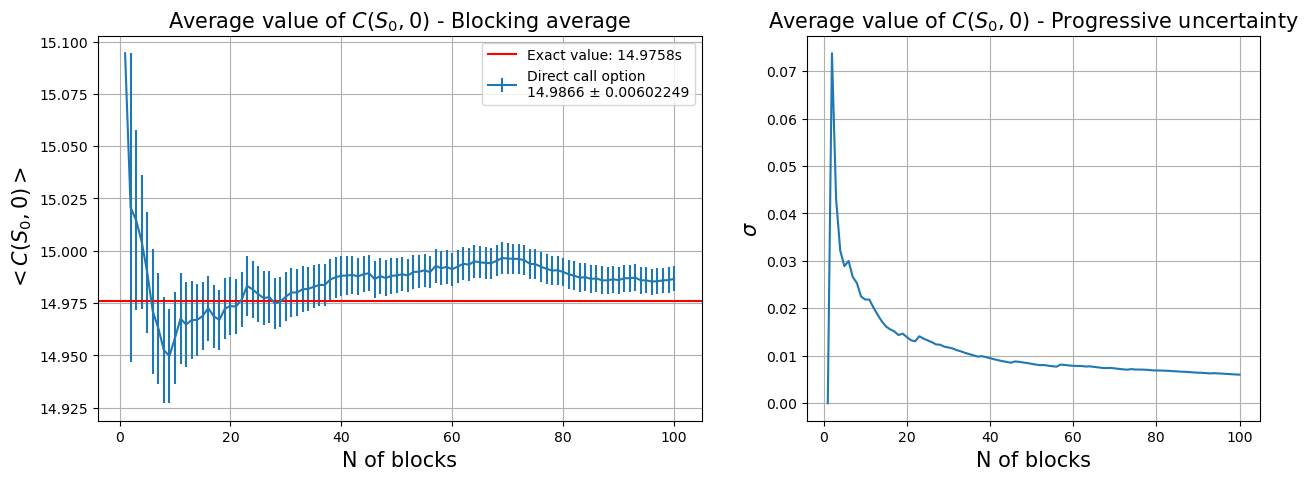

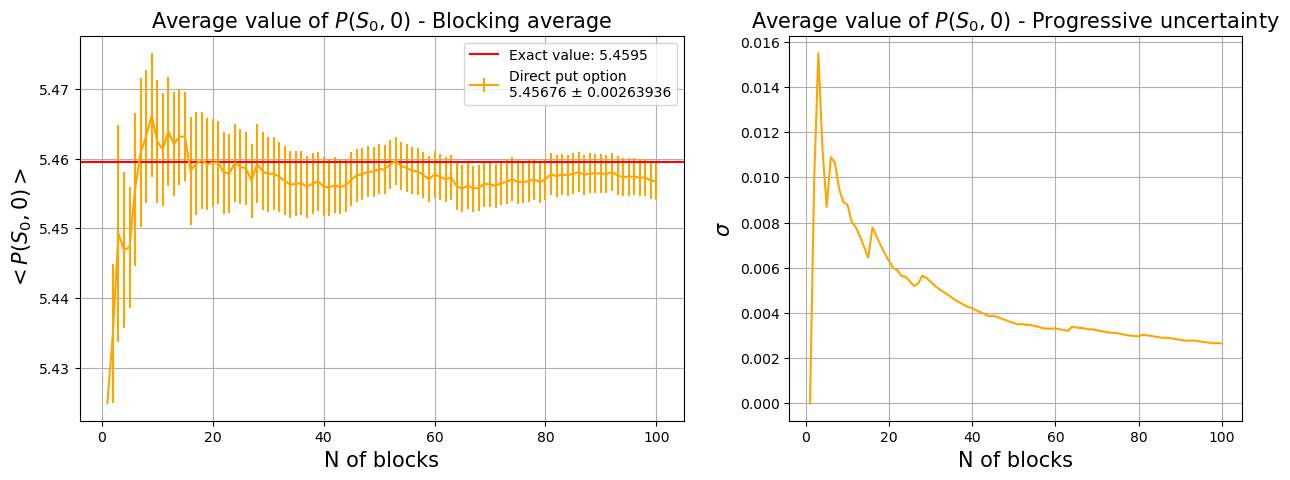

In [46]:
# --------- DIRECT CALL OPTION ---------
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/03.1a_directly_call_option.dat',
                                                          unpack = True, usecols = (0, 1, 2))
#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label, progressive_sum, yerr = progressive_error, 
                label = "Direct call option\n"+ str(progressive_sum[-1]) + " ± " + str(progressive_error[-1]))
axs[0].axhline(14.975790778311286, ls = '-', c = 'red', label = "Exact value: 14.9758s")
#style plot 1
axs[0].set_xlabel('N of blocks', fontsize = 15)
axs[0].set_ylabel('$<C(S_{0},0)>$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of $C(S_{0},0)$ - Blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('N of blocks', fontsize = 15)
axs[1].set_title('Average value of $C(S_{0},0)$ - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()


# --------- DIRECT PUT OPTION ---------
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/03.1a_directly_put_option.dat',
                                                          unpack = True, usecols = (0, 1, 2))

#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label, progressive_sum, yerr = progressive_error, c = 'orange', 
                label = "Direct put option\n"+ str(progressive_sum[-1]) + " ± " + str(progressive_error[-1]))
axs[0].axhline(5.4595325819072364, ls = '-', c = 'red', label = "Exact value: 5.4595")
#style plot 1
axs[0].set_xlabel('N of blocks', fontsize = 15)
axs[0].set_ylabel('$<P(S_{0},0)>$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of $P(S_{0},0)$ - Blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, c = 'orange', label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('N of blocks', fontsize = 15)
axs[1].set_title('Average value of $P(S_{0},0)$ - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()

Come si può vedere dai grafici, la generazione diretta è funzionale al nostro scopo. Dopo $100$ blocchi la misura è compatibile con il valore atteso entro $\sim 1 \sigma$.

#### Generazione indiretta

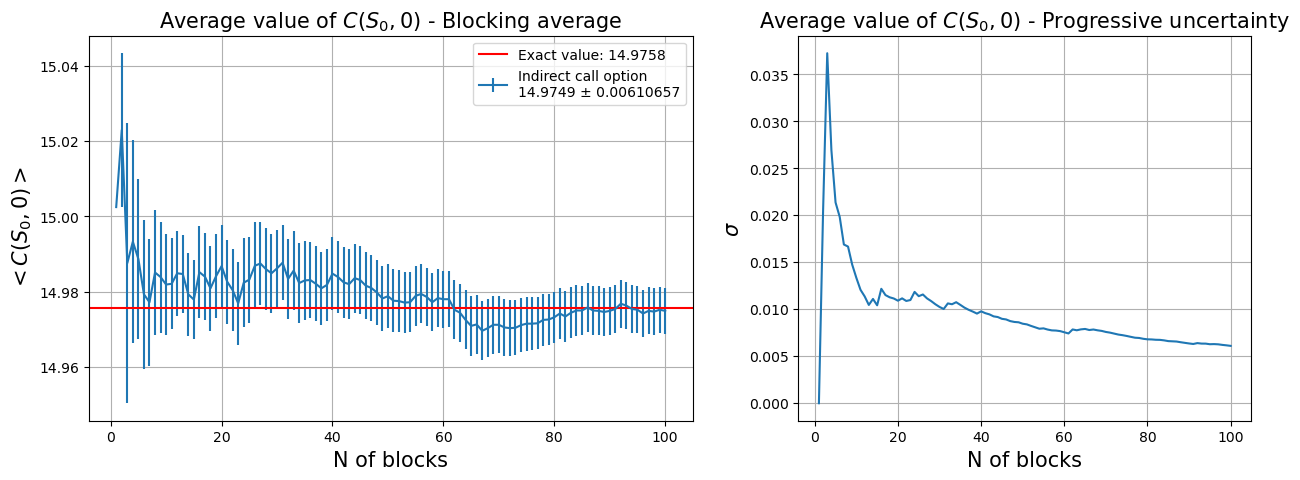

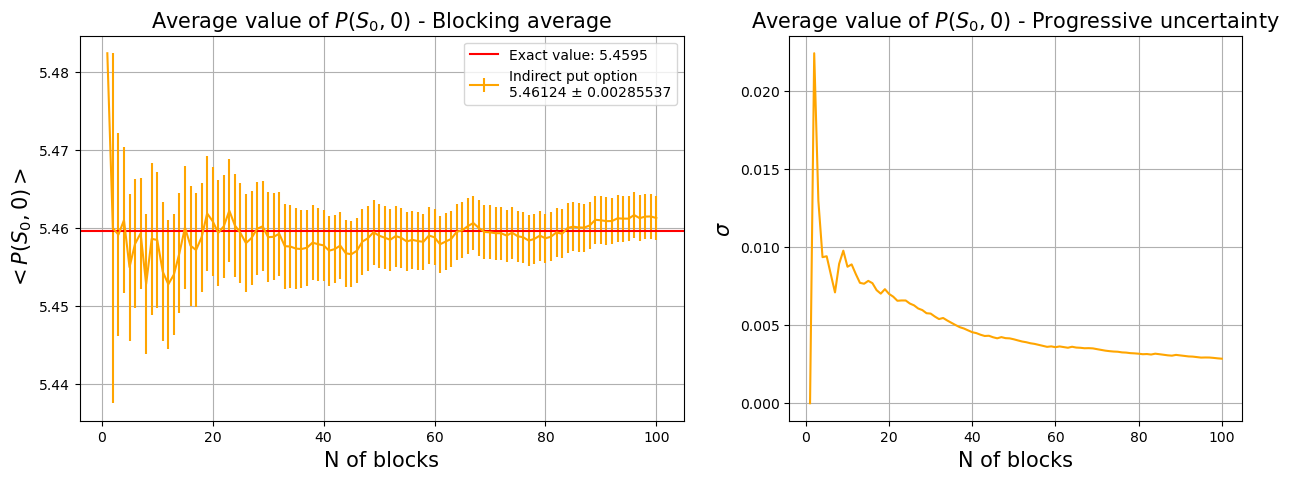

In [47]:
# --------- INDIRECT CALL OPTION ---------
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/03.1b_discretized_call_option.dat',
                                                          unpack = True, usecols = (0, 1, 2))

#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label, progressive_sum, yerr = progressive_error, 
                label = "Indirect call option\n"+ str(progressive_sum[-1]) + " ± " + str(progressive_error[-1]))
axs[0].axhline(14.975790778311286, ls = '-', c = 'red', label = "Exact value: 14.9758")
#style plot 1
axs[0].set_xlabel('N of blocks', fontsize = 15)
axs[0].set_ylabel('$<C(S_{0},0)>$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of $C(S_{0},0)$ - Blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('N of blocks', fontsize = 15)
axs[1].set_title('Average value of $C(S_{0},0)$ - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()


# --------- INDIRECT PUT OPTION ---------
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/03.1b_discretized_put_option.dat',
                                                          unpack = True, usecols = (0, 1, 2))

#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label, progressive_sum, yerr = progressive_error, c = 'orange', 
                label = "Indirect put option\n"+ str(progressive_sum[-1]) + " ± " + str(progressive_error[-1]))
axs[0].axhline(5.4595325819072364, ls = '-', c = 'red', label = "Exact value: 5.4595")
#style plot 1
axs[0].set_xlabel('N of blocks', fontsize = 15)
axs[0].set_ylabel('$<P(S_{0},0)>$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of $P(S_{0},0)$ - Blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, c = 'orange', label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('N of blocks', fontsize = 15)
axs[1].set_title('Average value of $P(S_{0},0)$ - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()

Confrontando i grafici risultati dalle simulazione delle due diverse generazioni è evidente come nel caso di generazione indiretta la misura si discosti meno dal valore atteso rispetto al caso di generazione diretta.